/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-17-ba3d415c36f1>:24: RuntimeWarning: invalid value encountered in scalar subtract
  theta_0 -= alpha * (1/m) * np.sum(error)
<ipython-input-17-ba3d415c36f1>:25: RuntimeWarning: invalid value encountered in scalar subtract
  theta_1 -= alpha * (1/m) * np.sum(error * x)


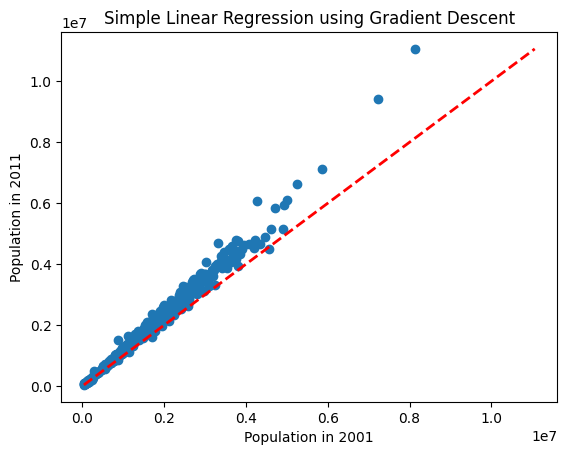

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simple Linear Regression using Gradient Descent
data = pd.read_csv('DistrictCentroids.csv')
data.head()

np.random.seed(0)

x = data['Population in 2001']
y = data['Population in 2011']

def gradient_descent(x, y, alpha=0.0001, iterations=1000):
    m = len(y) #no. of records
    # n = no. of features
    theta_0 = np.random.rand()
    theta_1 = np.random.rand()
    y_pred = 0

    for i in range(iterations):
        y_pred = theta_0 + theta_1 * x
        error = y_pred - y
        theta_0 -= alpha * (1/m) * np.sum(error)
        theta_1 -= alpha * (1/m) * np.sum(error * x)

    return theta_0, theta_1, y_pred

y_pred = np.zeros(len(y))
theta_0, theta_1, y_pred = gradient_descent(x, y)

plt.scatter(x, y)
plt.plot(x, theta_0 + theta_1 * x, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Simple Linear Regression using Gradient Descent')
plt.xlabel('Population in 2001')
plt.ylabel('Population in 2011')
plt.show()

Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def normalize(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

def intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

np.random.seed(0)

def mlr(X, y, learning_rate=0.01, iterations=1000):
    X = normalize(X)
    X = intercept(X)
    theta = np.random.rand(X.shape[1])
    # print(theta)
    m = len(y)

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        theta -= (learning_rate / m) * np.dot(X.T, predictions - y) #Repeat Convergence gradient descent
        #predictions - y = error
        # (X.T).E = gives gradient

    return theta

def predict(X, theta):
    X = normalize(X)
    X = intercept(X)
    return np.dot(X, theta)

data = pd.read_csv('Boston.csv')
X = data.drop('medv', axis=1).values
y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
theta = mlr(X_train, y_train)
y_pred = predict(X_test, theta)

mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

mae = np.mean(np.abs(y_pred - y_test))
print("Mean Absolute Error:", mae)

Mean Squared Error: 40.718632569643084
Mean Absolute Error: 4.851144947332075


NEW BEGINNINGS!

Multiple Linear Regression (sklearn):
MSE: 24.2911, R2: 0.6688

Multiple Linear Regression (scratch):
MSE: 24.2911, R2: 0.6688

Simple Linear Regression (sklearn):
MSE: 46.1448, R2: 0.3708

Simple Linear Regression (scratch):
MSE: 46.1448, R2: 0.3708


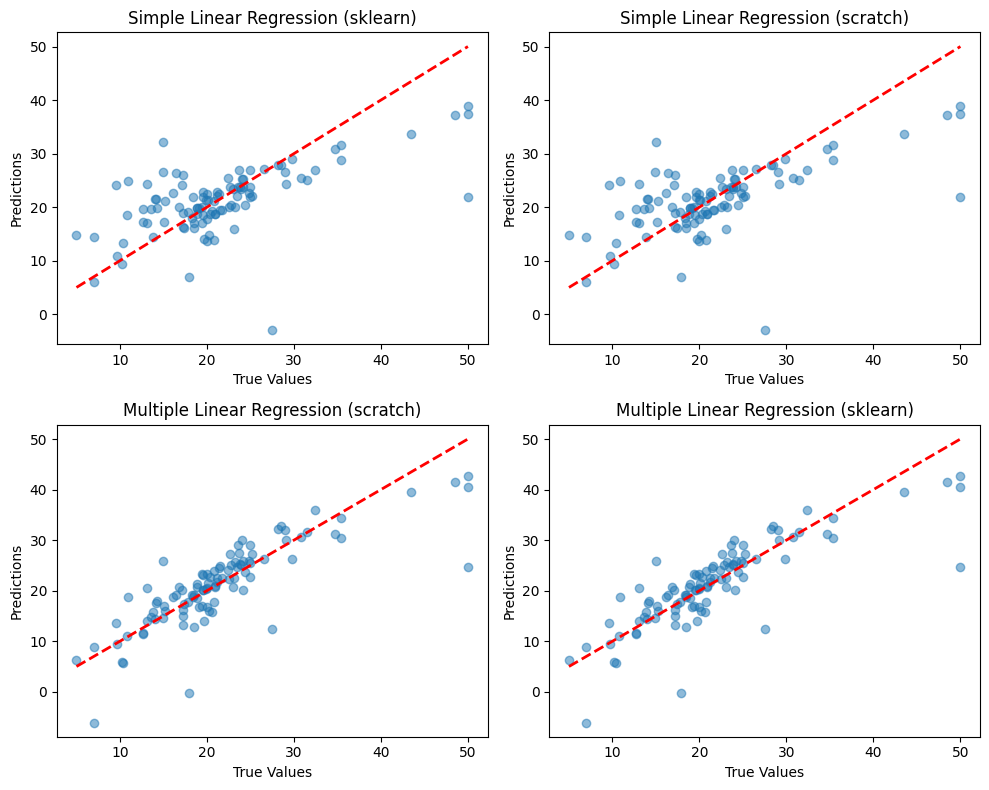

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Multiple Linear Regression using sklearn
def multiple_linear_regression_sklearn(X_train, X_test, y_train, y_test):
    model=LinearRegression()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    return y_pred, mse, r2

#Multiple Linear Regression from scratch
def multiple_linear_regression_scratch(X_train, X_test, y_train, y_test):
  #intercept 1 for b0
    X_train_intercept = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_test_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])

    # coefficients using the normal equation
    coefficients = np.linalg.inv(X_train_intercept.T.dot(X_train_intercept)).dot(X_train_intercept.T).dot(y_train)

    y_pred = X_test_intercept.dot(coefficients)

    #check
    mse = np.mean((y_test - y_pred)**2)
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

    return y_pred, mse, r2

#Simple Linear Regression using sklearn
def simple_linear_regression_sklearn(X_train, X_test, y_train, y_test, feature='rm'):
    X_train_simple = X_train[[feature]]
    X_test_simple = X_test[[feature]]

    model = LinearRegression()
    model.fit(X_train_simple, y_train)

    y_pred = model.predict(X_test_simple)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, mse, r2

#Simple Linear Regression from scratch
def simple_linear_regression_scratch(X_train, X_test, y_train, y_test, feature='rm'):
    X_train_simple = X_train[feature].values
    X_test_simple = X_test[feature].values

    # coefficients
    n = len(X_train_simple)
    x_mean = np.mean(X_train_simple)
    y_mean = np.mean(y_train)

    numerator = np.sum((X_train_simple - x_mean) * (y_train - y_mean))
    denominator = np.sum((X_train_simple - x_mean)**2)

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    #  predictions
    y_pred = slope * X_test_simple + intercept

    #  metrics
    mse = np.mean((y_test - y_pred)**2)
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
    #R² = 1 - (SS_res / SS_tot)
    #SS_res - sum of squared residuals (errors)
    #SS_tot - total sum of squares (variance)

    return y_pred, mse, r2



# all regression models
y_pred_multi_sklearn, mse_multi_sklearn, r2_multi_sklearn = multiple_linear_regression_sklearn(X_train, X_test, y_train, y_test)
y_pred_multi_scratch, mse_multi_scratch, r2_multi_scratch = multiple_linear_regression_scratch(X_train, X_test, y_train, y_test)
y_pred_simple_sklearn, mse_simple_sklearn, r2_simple_sklearn = simple_linear_regression_sklearn(X_train, X_test, y_train, y_test)
y_pred_simple_scratch, mse_simple_scratch, r2_simple_scratch = simple_linear_regression_scratch(X_train, X_test, y_train, y_test)

#  results
print("Multiple Linear Regression (sklearn):")
print(f"MSE: {mse_multi_sklearn:.4f}, R2: {r2_multi_sklearn:.4f}")

print("\nMultiple Linear Regression (scratch):")
print(f"MSE: {mse_multi_scratch:.4f}, R2: {r2_multi_scratch:.4f}")

print("\nSimple Linear Regression (sklearn):")
print(f"MSE: {mse_simple_sklearn:.4f}, R2: {r2_simple_sklearn:.4f}")

print("\nSimple Linear Regression (scratch):")
print(f"MSE: {mse_simple_scratch:.4f}, R2: {r2_simple_scratch:.4f}")


# Plotting functions
def plot_predictions(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_predictions(axs[0, 0], y_test, y_pred_simple_sklearn, "Simple Linear Regression (sklearn)")
plot_predictions(axs[0, 1], y_test, y_pred_simple_scratch, "Simple Linear Regression (scratch)")
plot_predictions(axs[1, 1], y_test, y_pred_multi_sklearn, "Multiple Linear Regression (sklearn)")
plot_predictions(axs[1, 0], y_test, y_pred_multi_scratch, "Multiple Linear Regression (scratch)")

plt.tight_layout()
plt.show()

Simple and Multiple Linear Regression using Gradient
Descent & Normal Equation Methods (without using
sklearn or an equivalent library for both)

MSE
Simple Linear Regression (Gradient Descent): 46.1448
Simple Linear Regression (Normal Equation): 46.1448
Multiple Linear Regression (Gradient Descent): 24.9174
Multiple Linear Regression (Normal Equation): 24.2911
R-squared scores:
Simple Linear Regression (Gradient Descent): 0.3708
Simple Linear Regression (Normal Equation): 0.3708
Multiple Linear Regression (Gradient Descent): 0.6602
Multiple Linear Regression (Normal Equation): 0.6688


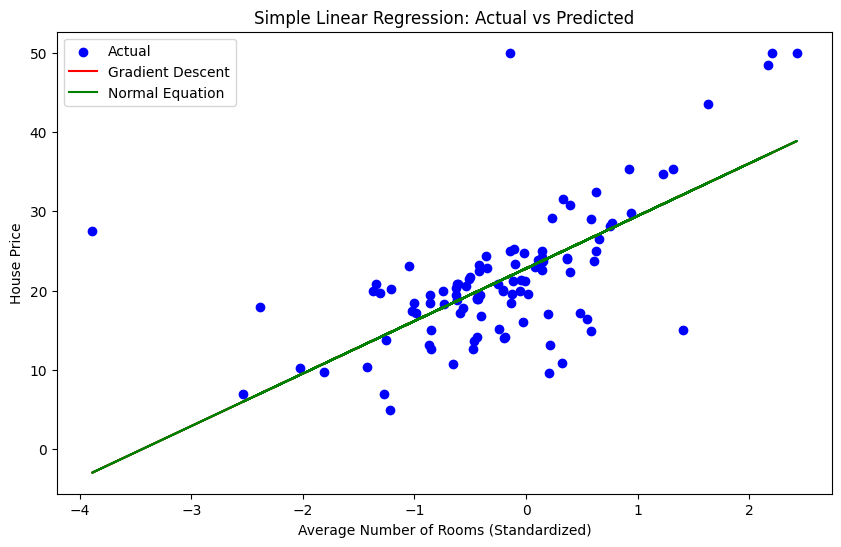

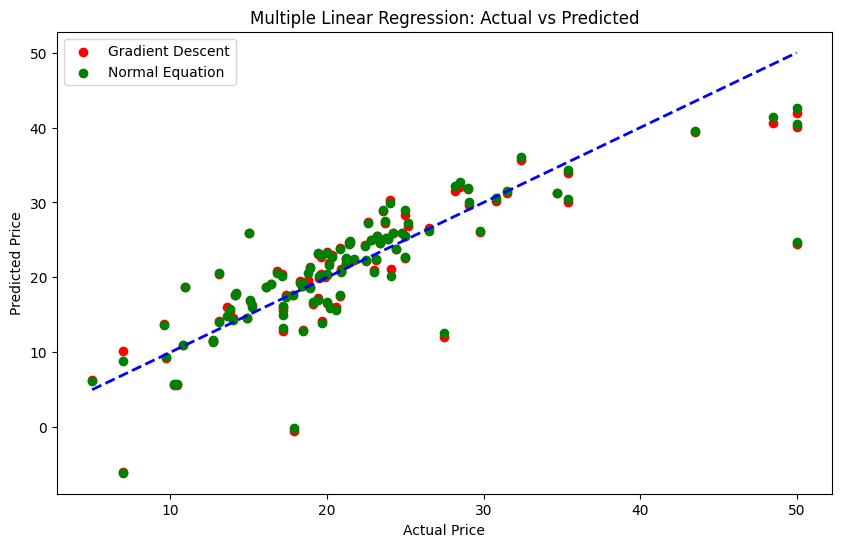

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.drop('medv', axis=1)
y = df['medv']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def compute_cost(X, y, theta):
    # cost function.
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    # gradient descent to learn theta.
    m = len(y)

    for _ in range(num_iters):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - y)

    return theta

def normal_equation(X, y):
    # theta -normal equation.
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def predict(X, theta):
    return X.dot(theta)

def r2_score(y_true, y_pred):
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

def MsE(y_test,y_pred):
  mseMetric = np.mean((y_test - y_pred)**2)
  return  mseMetric

# Simple Linear Regression
def simple_linear_regression(X, y, method):
    X = X[:, 5].reshape(-1, 1)  # Using only one feature (RM: average number of rooms)
    X = add_intercept(X)
    theta=0

    if method == 'gradient_descent':
        theta = np.zeros(2)
        theta= gradient_descent(X, y, theta, alpha=0.01, num_iters=1500)
    elif method == 'normal_equation':
        theta = normal_equation(X, y)

    return theta

# Multiple Linear Regression
def multiple_linear_regression(X, y, method):
    X = add_intercept(X)
    theta=0

    if method == 'gradient_descent':
        theta = np.zeros(X.shape[1])
        theta=gradient_descent(X, y, theta, alpha=0.01, num_iters=1500)
    elif method == 'normal_equation':
        theta = normal_equation(X, y)

    return theta

# Training
simple_gd_theta = simple_linear_regression(X_train_scaled, y_train, method='gradient_descent')
simple_ne_theta = simple_linear_regression(X_train_scaled, y_train, method='normal_equation')
multiple_gd_theta = multiple_linear_regression(X_train_scaled, y_train, method='gradient_descent')
multiple_ne_theta = multiple_linear_regression(X_train_scaled, y_train, method='normal_equation')

#  predictions
X_test_simple = add_intercept(X_test_scaled[:, 5].reshape(-1, 1))
X_test_multiple = add_intercept(X_test_scaled)

simple_gd_pred = predict(X_test_simple, simple_gd_theta)
simple_ne_pred = predict(X_test_simple, simple_ne_theta)
multiple_gd_pred = predict(X_test_multiple, multiple_gd_theta)
multiple_ne_pred = predict(X_test_multiple, multiple_ne_theta)

#  R-squared scores
simple_gd_r2 = r2_score(y_test, simple_gd_pred)
simple_ne_r2 = r2_score(y_test, simple_ne_pred)
multiple_gd_r2 = r2_score(y_test, multiple_gd_pred)
multiple_ne_r2 = r2_score(y_test, multiple_ne_pred)

#MSE
s_gd_mse = MsE(y_test, simple_gd_pred)
s_ne_mse = MsE(y_test, simple_ne_pred)
m_gd_mse = MsE(y_test, multiple_gd_pred)
m_ne_mse = MsE(y_test, multiple_ne_pred)


print("MSE")
print(f"Simple Linear Regression (Gradient Descent): {s_gd_mse:.4f}")
print(f"Simple Linear Regression (Normal Equation): {s_ne_mse:.4f}")
print(f"Multiple Linear Regression (Gradient Descent): {m_gd_mse:.4f}")
print(f"Multiple Linear Regression (Normal Equation): {m_ne_mse:.4f}")



print("R-squared scores:")
print(f"Simple Linear Regression (Gradient Descent): {simple_gd_r2:.4f}")
print(f"Simple Linear Regression (Normal Equation): {simple_ne_r2:.4f}")
print(f"Multiple Linear Regression (Gradient Descent): {multiple_gd_r2:.4f}")
print(f"Multiple Linear Regression (Normal Equation): {multiple_ne_r2:.4f}")

# results for Simple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 5], y_test, color='b', label='Actual')
plt.plot(X_test_scaled[:, 5], simple_gd_pred, color='r', label='Gradient Descent')
plt.plot(X_test_scaled[:, 5], simple_ne_pred, color='g', label='Normal Equation') #this line is overlapping
plt.xlabel('Average Number of Rooms (Standardized)')
plt.ylabel('House Price')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# results for Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, multiple_gd_pred, color='r', label='Gradient Descent')
plt.scatter(y_test, multiple_ne_pred, color='g', label='Normal Equation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()